# Regressão Logística & Métricas de Classificação

Outcomes esperados:

 - Saber identificar problemas de classificação entre duas classes

 - Ser capaz de interpretar resultados de diferentes métricas ao aplicar regressão logística na prática de negócios

 - Ser capaz de criar e interpretar ROC curves a partir da matriz de confusão


Perguntas-chave:

 - Como diferenciar problemas de classificação e de regressão?

 - Quando utilizar a regressão logística?

 - Como são atribuídas as classes de objetos?

 - Como interpretar resultados e fazer predições?

 - Quais métricas são mais indicadas para os tipos de problemas comumente enfrentados por data scientists?


Palavras-chave: problemas de classificação, regressão logística, log odds ratio, ROC curve, matriz de confusão, métricas de negócio, threshold

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

## Carregar o dataset

In [3]:
## Faça download e carregue o dataset

In [4]:
df = pd.read_csv('lending-club-loan-data/small_loan.csv', low_memory=False)

In [5]:
## dê uma inpecionada no dataset. Qual o nro de linhas? E o nro de colunas?

In [6]:
df.shape

(938821, 148)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'issue_month', 'issue_year'],
      dtype='object', length=148)

In [8]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_month,issue_year
0,0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,...,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Dec,2018
1,1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,...,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Dec,2018
2,2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,...,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Dec,2018
3,3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,Feb-2019,146.51,Mar-2019,Feb-2019,...,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,Dec,2018
4,4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec

## O que pode ser feito com esse dataset?

 - O que pode ser predito?
 - Vale a pena predizer com 148 variáveis presentes?
 - Existem variáveis repetidas?
 - Existem variáveis nulas?
 

In [9]:
df.loan_status.value_counts()

Current               709082
Fully Paid            162761
Charged Off            43321
Late (31-120 days)     14974
In Grace Period         6017
Late (16-30 days)       2647
Default                   19
Name: loan_status, dtype: int64

In [10]:
len(df[(df.loan_status != 'Current')])

229739

In [11]:
# vamos remover os emprestimos que ainda estão em dia e que não foram totalmente pagos, os "Current"

In [12]:
past_df = df[(df.loan_status != 'Current')]

In [13]:
past_df['good_loan'] = past_df.loan_status == 'Fully Paid'

/home/bahbbc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
# vamos remover as variáveis que tem alto nro de nulos

In [15]:
past_df.isnull().mean().sort_values(ascending=False).head(50)

id                                            1.000000
url                                           1.000000
member_id                                     1.000000
desc                                          1.000000
orig_projected_additional_accrued_interest    0.993867
hardship_start_date                           0.991451
hardship_length                               0.991451
hardship_type                                 0.991451
hardship_reason                               0.991451
hardship_status                               0.991451
deferral_term                                 0.991451
hardship_amount                               0.991451
hardship_end_date                             0.991451
payment_plan_start_date                       0.991451
hardship_dpd                                  0.991451
hardship_loan_status                          0.991451
hardship_payoff_balance_amount                0.991451
hardship_last_payment_amount                  0.991451
debt_settl

In [93]:
complete_df = past_df[['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'good_loan']]

In [94]:
complete_df.isnull().mean().sort_values(ascending=False).head(50)

mths_since_last_record    0.816592
mths_since_last_delinq    0.506940
dti                       0.001375
revol_util                0.001019
good_loan                 0.000000
total_acc                 0.000000
revol_bal                 0.000000
pub_rec                   0.000000
open_acc                  0.000000
inq_last_6mths            0.000000
delinq_2yrs               0.000000
annual_inc                0.000000
installment               0.000000
int_rate                  0.000000
loan_amnt                 0.000000
dtype: float64

In [95]:
complete_df.fillna(0, inplace=True)

/home/bahbbc/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [96]:
complete_df.isnull().mean().sort_values(ascending=False).head(50)

good_loan                 0.0
total_acc                 0.0
revol_util                0.0
revol_bal                 0.0
pub_rec                   0.0
open_acc                  0.0
mths_since_last_record    0.0
mths_since_last_delinq    0.0
inq_last_6mths            0.0
delinq_2yrs               0.0
dti                       0.0
annual_inc                0.0
installment               0.0
int_rate                  0.0
loan_amnt                 0.0
dtype: float64

In [98]:
complete_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,229739.000000,229739.000000,229739.000000,2.297390e+05,229739.000000,229739.000000,229739.000000,229739.000000,229739.000000,229739.000000,229739.000000,2.297390e+05,229739.000000,229739.000000
mean,14703.051942,14.038366,448.157762,7.897532e+04,18.857116,0.306095,0.584006,17.181110,13.705344,11.590109,0.221460,1.511135e+04,44.656685,24.077340
std,9698.418006,5.630228,291.887449,7.711965e+04,18.257945,0.876699,0.851785,23.248452,30.870235,5.799144,0.569055,2.191813e+04,25.327179,12.311062
min,1000.000000,5.310000,30.120000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,7000.000000,10.410000,232.640000,4.700000e+04,11.400000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,4.969000e+03,24.600000,15.000000
50%,12000.000000,13.490000,366.720000,6.600000e+04,17.520000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,9.960000e+03,43.200000,22.000000
75%,20000.000000,16.990000,606.760000,9.500000e+04,24.420000,0.000000,1.000000,31.000000,0.000000,14.000000,0.000000,1.814650e+04,63.500000,31.000000
max,40000.000000,30.990000,1719.830000,1.099920e+07,999.000000,36.000000,5.000000,226.000000,124.000000,88.000000,44.000000,1.696796e+06,154.900000,151.000000


## Qual é a proporção de dados de empréstimos ruins?

In [ ]:
# verifique a variável 

In [99]:
complete_df.good_loan.mean()

0.70846047035984316

## Agora vamos fazer uma predição

In [34]:
# divida o dataset em treino e teste

In [100]:
X_train, X_test, y_train, y_test = train_test_split(complete_df.drop('good_loan',axis=1),
                                                    complete_df['good_loan'],test_size=0.3,random_state=42)

In [36]:
# agora vamos utilizar a LogisticRegression do sklearn e utilizar o fit

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [103]:
# agora vamos ver como ficaram as previsões

In [114]:
y_pred = clf.predict(X_test)

In [146]:
y_pred_proba = clf.predict_proba(X_test)

## Essa predição ficou boa? Como saber?

Podemos usar a acurácia

In [109]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, y_pred)

0.70939612895737214

Será que a acurácia mostra os resultados que queremos? Quais outras métricas podemos utilizar para verificar melhor como está o acerto em cada uma das classes?

In [112]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.51      0.09      0.15     20111
       True       0.72      0.97      0.82     48811

avg / total       0.66      0.71      0.63     68922



In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test, y_pred)

array([[ 1730, 18381],
       [ 1648, 47163]])

Como adaptar esse código https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py para que seja possível ver a matriz de confusão de uma maneira melhor?

In [135]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [136]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['0', '1']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 1730 18381]
 [ 1648 47163]]


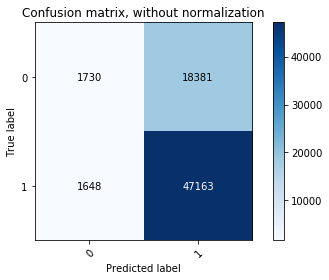

In [137]:
plot_confusion_matrix(y_test, y_pred,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.08602257  0.91397743]
 [ 0.03376288  0.96623712]]


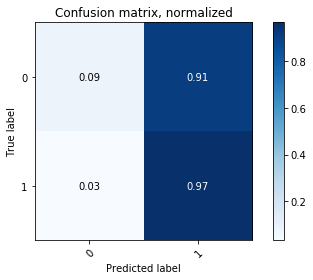

In [140]:
plot_confusion_matrix(y_test, y_pred, normalize=True,
                      title='Confusion matrix, normalized')

## E se eu quiser analizar as probabilidades?

Por padrão o sklearn divide as probabilidades em 0.5. Mas nos poderíamos mudar isso e até mesmo escolher um outro corte melhor.

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [194]:
fpr, tpr, roc = roc_curve(y_test, y_pred_proba[:, 1])

In [195]:
auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [196]:
auc

0.61043642073843429

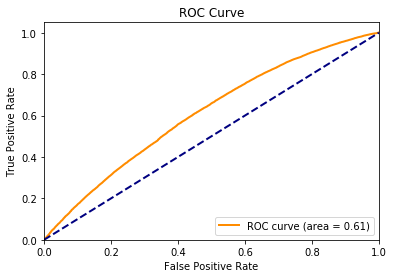

In [197]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## O que eu posso fazer para melhorar?

In [168]:
# a primeira coisa é balancear as classes

In [170]:
balanced_clf = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train, y_train)

In [171]:
y_pred_b = clf.predict(X_test)

In [172]:
y_pred_proba_b = clf.predict_proba(X_test)

In [173]:
# posso rever as métricas e validar se foi uma predição interessante

In [175]:
accuracy_score(y_test, y_pred_b)

0.63785148428658478

In [176]:
print(classification_report(y_test, y_pred_b))

             precision    recall  f1-score   support

      False       0.42      0.63      0.50     20111
       True       0.81      0.64      0.72     48811

avg / total       0.69      0.64      0.65     68922



Confusion matrix, without normalization
[[12588  7523]
 [17437 31374]]


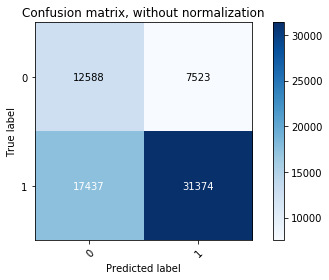

In [179]:
plot_confusion_matrix(y_test, y_pred_b,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.62592611  0.37407389]
 [ 0.35723505  0.64276495]]


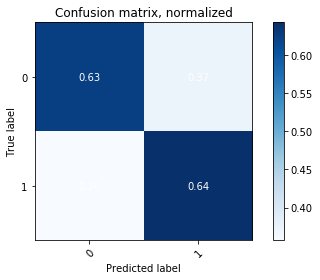

In [180]:
plot_confusion_matrix(y_test, y_pred_b, normalize=True,
                      title='Confusion matrix, normalized')

In [198]:
fpr, tpr, roc = roc_curve(y_test, y_pred_proba_b[:, 1])

In [199]:
balanced_auc = roc_auc_score(y_test, y_pred_proba_b[:,1])
balanced_auc

0.68559637830083608

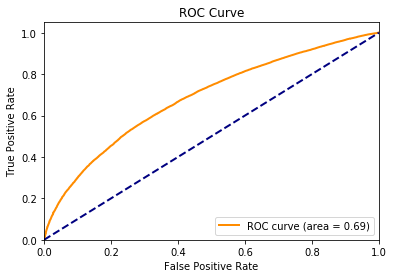

In [200]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % balanced_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Como seria se fosse aleatório?

Como você faria para plotar as curvas no mesmo plot?

Quais tipos de variáveis você acrescentaria para melhorar esse plot?

In [205]:
# Adicionar o StandardScale